In [12]:
import sys
import os
from pathlib import Path
from glob import glob

In [13]:
sys.path.append('..')

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [15]:
from experiments.eval_features import eval_features

In [16]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
PATH_RESULTS = os.path.join(PATH_ROOT, 'results', 'exp643896')
PATH_OUTPUT = os.path.join(PATH_RESULTS, 'roc')

print(PATH_RESULTS)

/home/lukec/workspace/baard_v4/results/exp643896


In [17]:
PATH_OUTPUT = os.path.join(PATH_RESULTS, 'roc')

if not os.path.exists(PATH_OUTPUT):
    print(f'Create {PATH_OUTPUT}')
    os.makedirs(PATH_OUTPUT)

In [18]:
K_LIST = np.concatenate([np.arange(1, 10, 1), np.arange(10, 100, 5), np.arange(10, 201, 10)])

In [19]:
def eval_k(detector_name,
           data_name='MNIST',
           attack_name='APGD-inf',
           eps='0.22',
           path_output=PATH_OUTPUT,
           k_list=K_LIST):
    path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

    files_adv = [f'ReliabilityStage-{k}-{data_name}-{attack_name}-{eps}.pt' for k in k_list]
    files_clean = [f'ReliabilityStage-{k}-{data_name}-{attack_name}-clean.pt' for k in k_list]

    df_auc_all = pd.DataFrame()
    for file_clean, file_adv in zip(files_clean, files_adv):
        _, df_auc_tpr = eval_features(path_input, path_output, file_clean, file_adv)
        df_auc_all = pd.concat([df_auc_all, df_auc_tpr], ignore_index=True)
    df_auc_all['k'] = k_list

    df_sn_plot = df_auc_all.melt('k', var_name='cols', value_name='rate')
    sn.lineplot(data=df_sn_plot.query(('cols == "auc" | cols == "5fpr"')), x='k', y='rate', hue='cols')


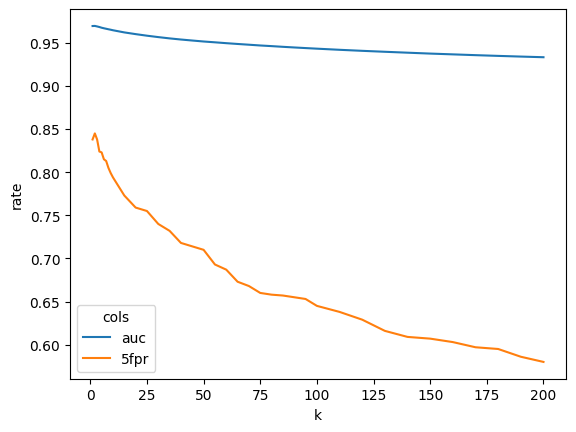

In [20]:
eval_k('ReliabilityStage_tuneK', 'MNIST', 'APGD-inf', eps='0.22')

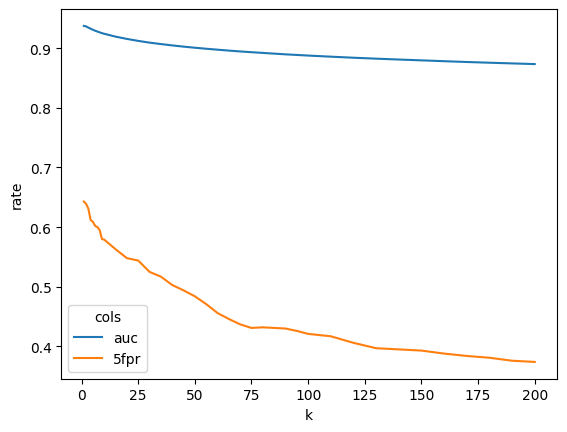

In [21]:
eval_k('ReliabilityStage_tuneK', 'MNIST', 'APGD-2', eps='4.0')